In [77]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
rideshare_df = pd.merge(ride_df, city_df, on="city", how="outer" )
# Display the data table for preview
rideshare_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [78]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

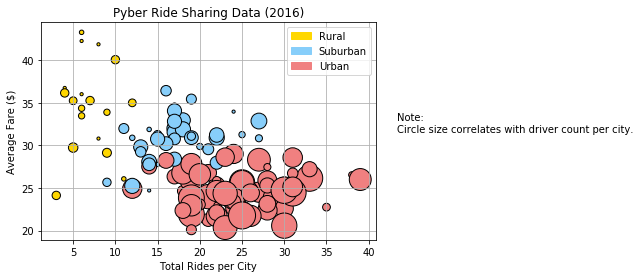

In [84]:
# Obtain the x and y coordinates for each of the three city types
rideshare_summary = rideshare_df.groupby(["city", "type"], as_index = False).agg({"fare" : ["mean", "sum"], 
                                                        "driver_count" : ["mean", "count"]})
rideshare_summary_df = pd.DataFrame(rideshare_summary)
rideshare_summary_df.columns= ["city", "type", "avg fare", "total fares", "drivers", "trips"]

colors = {"Rural" : "gold", "Suburban" : "lightskyblue", "Urban": "lightcoral"}

for i in range(len(rideshare_summary_df)):
    rideshare_summary_df.loc[i, "color"] = colors[rideshare_summary_df.loc[i, "type"]]
#print(rideshare_summary_df)

# Build the scatter plots for each city types

plt.scatter(rideshare_summary_df["trips"], rideshare_summary_df["avg fare"], 
            color=rideshare_summary_df["color"],
            edgecolor="black",
            s=rideshare_summary_df["drivers"]*10)
# Incorporate the other graph properties
plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(b=True, which="major", axis="both")
# Create a legend
patchlist = []
for key in colors:
    data_key = mpatches.Patch(color=colors[key], label = key)
    patchlist.append(data_key)
plt.legend(handles=patchlist)

# Incorporate a text label regarding circle size
plt.figtext(0.95, 0.5, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("results/Pyber_2016", bbox_inches="tight")

## Total Fares by City Type

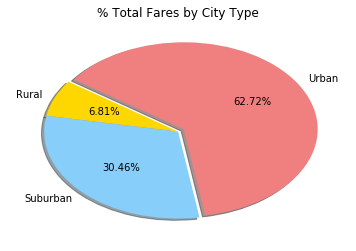

In [49]:
# Calculate Type Percents
fare_summary = rideshare_summary_df.groupby(["type"], as_index=False).agg({"total fares" : "sum"})
fare_summary_df = pd.DataFrame(fare_summary)
# print(fare_summary_df)
# Build Pie Chart
plt.pie(fare_summary_df["total fares"], colors=colors.values(), autopct= "%.2f%%", startangle=145, 
        explode=[0, 0, 0.05], shadow=True, labels=fare_summary_df["type"])
plt.title("% Total Fares by City Type")


# Save Figure
plt.savefig("results/Fare_breakdown")

## Total Rides by City Type

       type  total fares
0     Rural      4327.93
1  Suburban     19356.33
2     Urban     39854.38


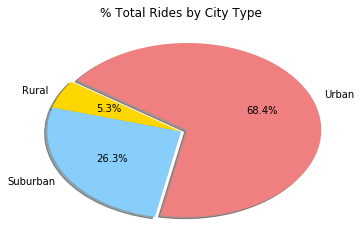

In [51]:
# Calculate Ride Percents
ride_summary = rideshare_summary_df.groupby(["type"], as_index=False).agg({"trips" : "sum"})
ride_summary_df = pd.DataFrame(ride_summary)
print(fare_summary_df)
# Build Pie Chart
plt.pie(ride_summary_df["trips"], colors=colors.values(), autopct= "%.1f%%", startangle=145, 
        explode=[0, 0, 0.05], shadow=True, labels=fare_summary_df["type"])
plt.title("% Total Rides by City Type")


# Save Figure
plt.savefig("results/Trips_breakdown")



## Total Drivers by City Type

       type  drivers
0     Rural       78
1  Suburban      490
2     Urban     2405


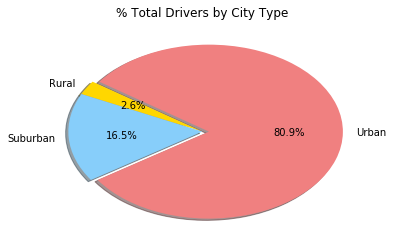

In [53]:
# Calculate Driver Percents
driver_summary = rideshare_summary_df.groupby(["type"], as_index=False).agg({"drivers" : "sum"})
driver_summary_df = pd.DataFrame(driver_summary)
print(driver_summary_df)
# Build Pie Chart
plt.pie(driver_summary_df["drivers"], colors=colors.values(), autopct= "%.1f%%", startangle=145, 
        explode=[0, 0, 0.05], shadow=True, labels=fare_summary_df["type"])
plt.title("% Total Drivers by City Type")


# Save Figure
plt.savefig("results/Drivers_breakdown")



# Conclusions
1. Typical fares are highest in rural areas and lowest in urban areas.
2. On average, there are more Uber drivers in urban areas, and many fewer in rural areas. 
3. There are also many more trips in urban areas. Question would be, is that because there are more drivers, or because there are more customers? 
